# Setup

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
import os


In [4]:
drive.mount("/content/drive", force_remount=True)
root = "/content/drive/My Drive/Horse Category Classification"
os.chdir(root)
data_root = root + "/data"
data_root_train = data_root + "/train"
data_root_test = data_root + "/test"

Mounted at /content/drive


# 01 Data Exploration

### Load Data

In [47]:
BATCH_SIZE = 32
HEIGHT = 224
WIDTH = 224

In [48]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_root_train,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(HEIGHT, WIDTH),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    crop_to_aspect_ratio=False
)

Found 471 files belonging to 3 classes.
Using 377 files for training.


In [49]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_root_train,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(HEIGHT, WIDTH),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    crop_to_aspect_ratio=False
)

Found 471 files belonging to 3 classes.
Using 94 files for validation.


In [50]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_root_test,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(HEIGHT, WIDTH),
    shuffle=False,
)

Found 118 files belonging to 3 classes.


### Class Distribution

In [51]:
class_names = test_ds.class_names
CLASS_NAMES = class_names
num_classes = len(class_names)

In [52]:
def print_distribution(title, class_names, dataset):
  class_counts = [0] * len(class_names)
  for _, labels in dataset:
    for label in labels.numpy():
      class_counts[label] += 1
  plt.figure(figsize=(10, 6))
  plt.bar(class_names, class_counts)
  plt.xlabel('Class')
  plt.ylabel('Count')
  plt.title(title)
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.show()


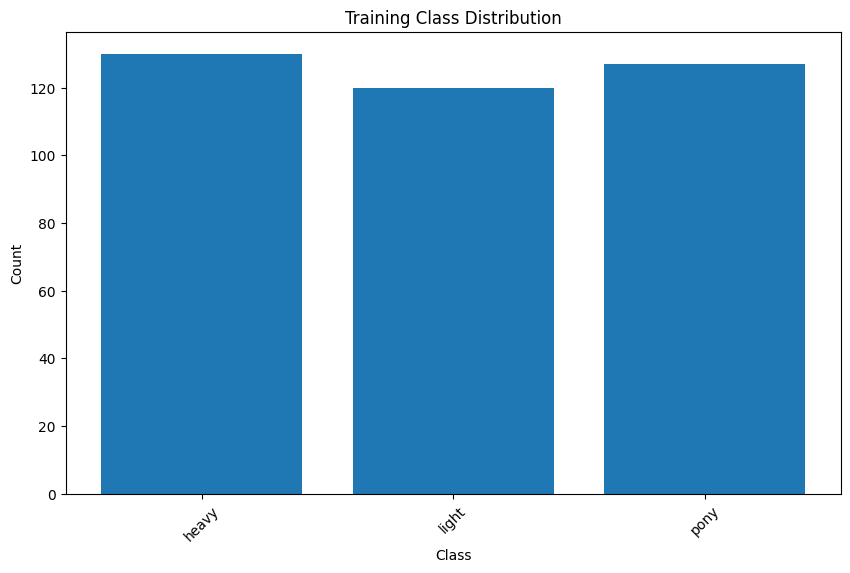

In [53]:
# train distribution
print_distribution("Training Class Distribution", class_names, train_ds)

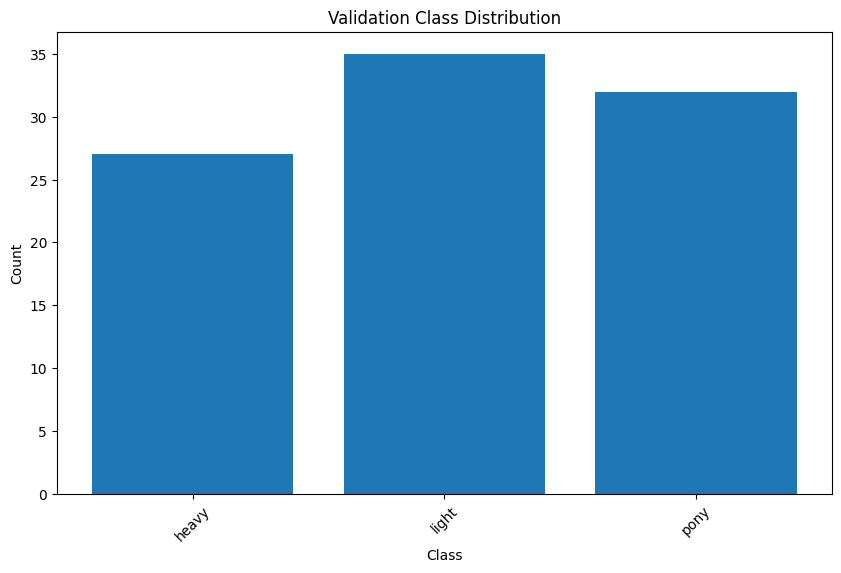

In [54]:
# val distribution
print_distribution("Validation Class Distribution", class_names, val_ds)

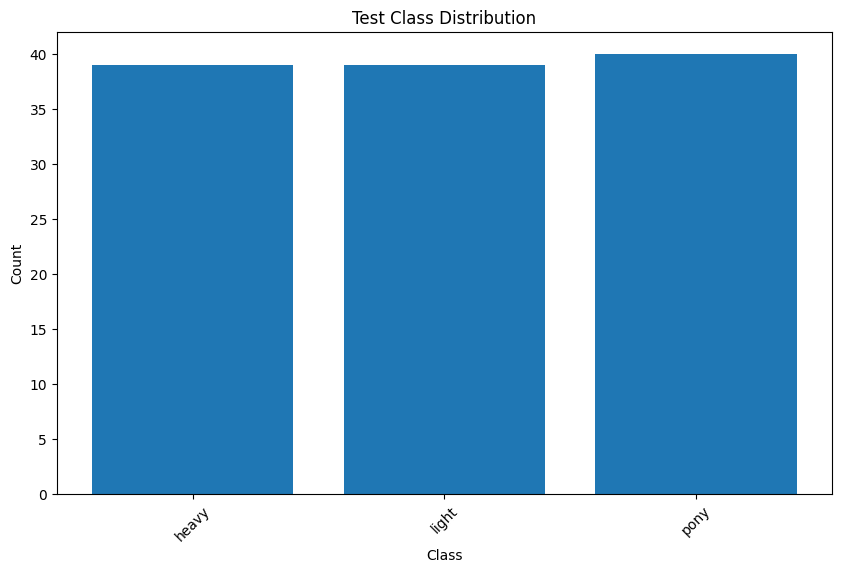

In [55]:
# test distribution
print_distribution("Test Class Distribution", class_names, test_ds)

### Sneakpeek

In [56]:
def sneak_peek(dataset, class_names):
  plt.figure(figsize=(8, 8))
  for images, labels in dataset.take(1):
    for i in range(25):
      ax = plt.subplot(5, 5, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

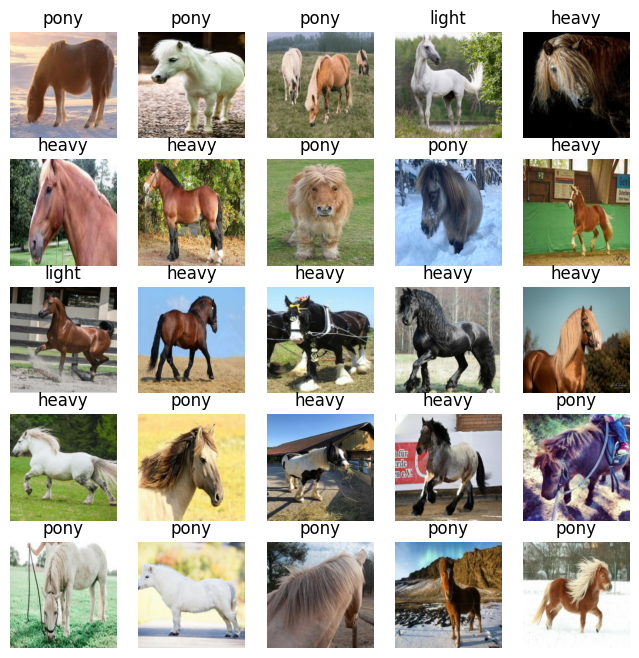

In [57]:
# looking at the training set
sneak_peek(train_ds, class_names)

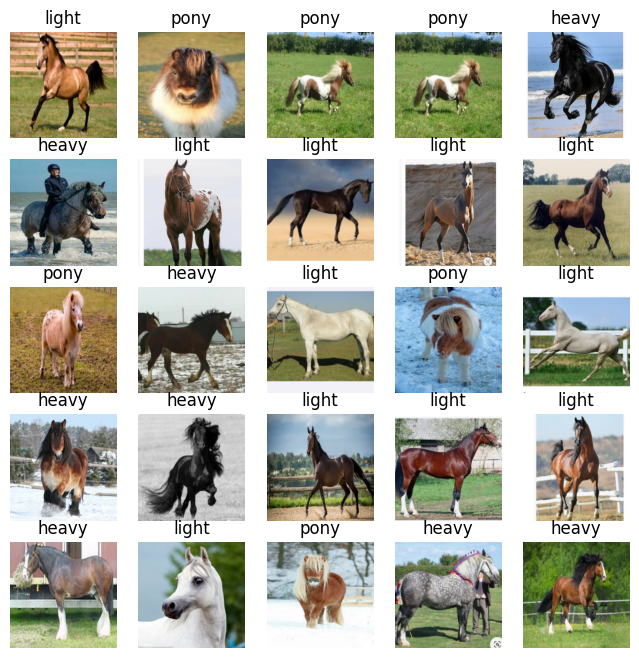

In [58]:
# looking at the validation set
sneak_peek(val_ds, class_names)

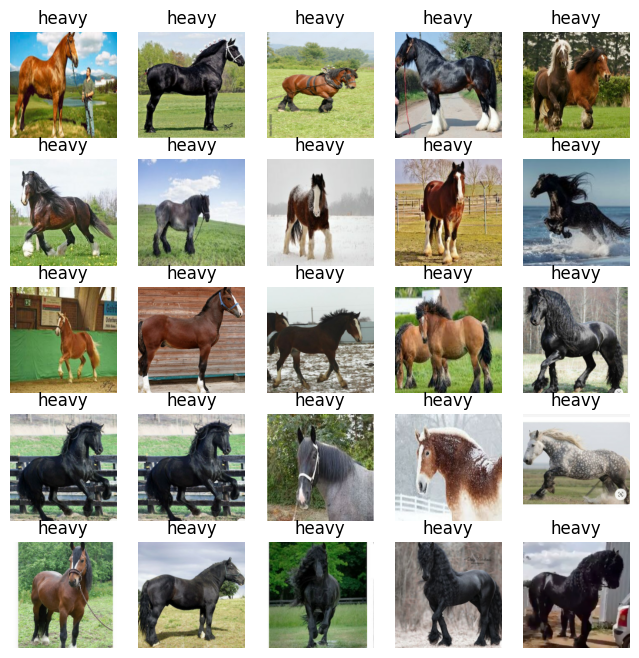

In [59]:
# looking at the test set (shuffling is not active, therefore all from the same category)
sneak_peek(test_ds, class_names)